In [172]:
import matplotlib.pyplot as pl
import matplotlib as mpl
pl.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns

In [173]:
births=pd.read_csv('births.csv')
births.head()

year  month  day gender  births
0  1969      1  1.0      F    4046
1  1969      1  1.0      M    4440
2  1969      1  2.0      F    4454
3  1969      1  2.0      M    4548
4  1969      1  3.0      F    4548

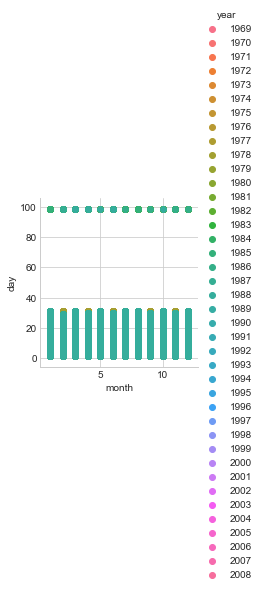

In [174]:
sns.FacetGrid(births,hue="year")\
    .map(pl.scatter,"month","day")\
    .add_legend()

In [175]:
quartiles=np.percentile(births['births'],[25,50,75])
print("min is",np.min(births.births))
print("max is",np.max(births.births))
quartiles
births.dropna(inplace=True)
births.shape

min is 1
max is 199622


(15067, 5)

In [176]:
mu,sig=quartiles[1],0.74*(quartiles[2]-quartiles[0])
births['day']=births['day'].astype(int)

In [177]:
births=births.query('(births>@mu-5*@sig)&(births<@mu+5*@sig)')
births.shape

(14610, 5)

In [178]:
births.index=pd.to_datetime(10000*births.year+
                            100*births.month+
                            births.day,format='%Y%m%d'
                           )

In [179]:
births.head()

year  month  day gender  births
1969-01-01  1969      1    1      F    4046
1969-01-01  1969      1    1      M    4440
1969-01-02  1969      1    2      F    4454
1969-01-02  1969      1    2      M    4548
1969-01-03  1969      1    3      F    4548

In [195]:
births_bydate=births.pivot_table('births',
                                 births.index.month,births.index.day)
births_bydate.fillna(np.mean(births_bydate[30]),inplace=True)
# births_bydate.index = [pd.datetime(2012, month, day) for (month, day) in births_bydate.index]
births_bydate

1         2         3         4         5         6         7   \
1   4009.225  4247.400  4500.900  4571.350  4603.625  4668.150  4706.925   
2   4661.450  4743.025  4761.825  4760.825  4728.300  4678.100  4649.650   
3   4742.175  4750.550  4871.775  4821.550  4781.600  4721.875  4722.450   
4   4623.825  4743.825  4652.925  4679.525  4586.825  4642.850  4689.850   
5   4651.275  4616.700  4570.225  4577.000  4687.300  4678.950  4658.950   
6   4751.475  4804.650  4783.275  4744.475  4706.875  4771.850  4681.050   
7   5021.975  5021.450  4869.425  4335.325  4698.825  4984.500  5153.425   
8   5068.000  5008.525  5065.250  5087.950  5108.000  5110.925  5082.675   
9   4908.325  4982.000  5003.925  5013.400  4954.600  4955.000  4995.450   
10  5167.325  5103.625  5067.375  5005.175  5025.075  5048.100  5024.100   
11  4729.800  4727.150  4821.775  4849.400  4808.075  4758.475  4783.175   
12  4836.500  4830.300  4758.500  4718.725  4734.675  4683.050  4704.325   

          8         9         10  ...        22        23        24        25  \
1   4629.650  4537.775  4591.700  ...  4742.800  4666.750  4653.200  4698.000   
2   4668.525  4713.575  4800.850  ...  4751.525  4757.450  4829.000  4857.025   
3   4718.225  4692.075  4785.375  ...  4667.200  4697.200  4725.050  4773.650   
4   4712.025  4649.875  4610.675  ...  4686.700  4643.725  4581.150  4602.250   
5   4623.750  4608.850  4623.175  ...  4713.500  4721.100  4689.125  4661.925   
6   4681.950  4784.275  4831.375  ...  4795.625  4850.550  4897.525  4890.925   
7   5159.800  5075.400  5041.300  ...  5135.675  5092.275  5036.050  5029.325   
8   5153.575  5027.775  5083.375  ...  5058.850  5007.050  5035.200  5107.675   
9   5165.475  5263.400  5214.500  ...  5316.825  5320.425  5284.050  5240.000   
10  4989.875  4945.425  4975.975  ...  4810.250  4755.500  4758.775  4744.350   
11  4752.750  4784.125  4836.300  ...  4601.900  4650.650  4647.125  4649.800   
12  4803.800  4793.825  4785.325  ...  4661.925  4466.675  4126.250  3844.450   

          26        27        28        29           30           31  
1   4715.900  4747.025  4771.800  4702.300  4644.225000  4598.275000  
2   4790.575  4693.750  4695.300  4623.400  4867.477273  4867.477273  
3   4722.825  4680.850  4694.650  4665.025  4663.425000  4723.250000  
4   4588.500  4571.950  4656.550  4613.250  4615.100000  4867.477273  
5   4657.750  4738.150  4671.650  4704.050  4601.175000  4597.050000  
6   4853.975  4852.325  4862.975  4881.650  4981.600000  4867.477273  
7   4998.700  5070.250  5133.525  5151.900  5101.225000  5045.275000  
8   5167.500  5124.700  5099.775  5062.000  5027.850000  5048.650000  
9   5250.650  5190.150  5168.450  5218.825  5224.775000  4867.477273  
10  4788.050  4821.350  4826.100  4775.575  4745.050000  4662.800000  
11  4587.250  4511.550  4590.775  4676.725  4765.475000  4867.477273  
12  4383.525  4850.150  5044.200  5120.150  5172.350000  4859.200000  

[12 rows x 31 columns]

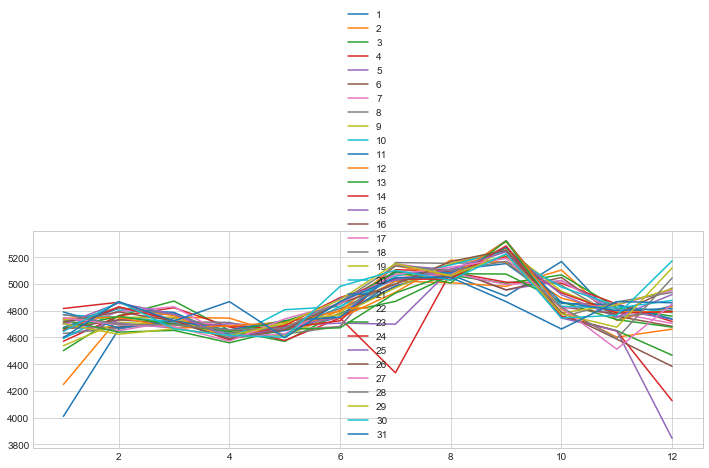

In [196]:
fig,ax=pl.subplots(figsize=(12,4))
births_bydate.plot(ax=ax)

C:\Users\RINSU\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  if sys.path[0] == '':


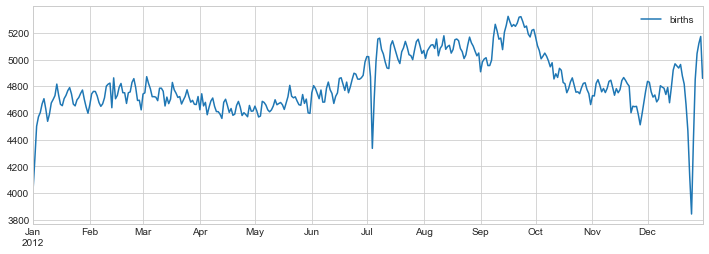

In [197]:
births = pd.read_csv('births.csv')
quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')
births['day'] = births['day'].astype(int)
births.index = pd.to_datetime(10000 * births.year +
100 * births.month +
births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
[births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
for (month, day) in births_by_date.index]
fig, ax = pl.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax);

In [198]:
births_by_date

births
2012-01-01  4009.225
2012-01-02  4247.400
2012-01-03  4500.900
2012-01-04  4571.350
2012-01-05  4603.625
...              ...
2012-12-27  4850.150
2012-12-28  5044.200
2012-12-29  5120.150
2012-12-30  5172.350
2012-12-31  4859.200

[366 rows x 1 columns]